In [9]:
import numpy as np
import zarr
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [37]:
data = zarr.load("./mimicry_2024-06-14_23-14-03.zarr/")

In [38]:
s = data['s']
v = data['v']
d = data['d']

s_df = pd.DataFrame(s)
d_df = pd.DataFrame(d)

Text(0.5, 1.0, 'avg detection')

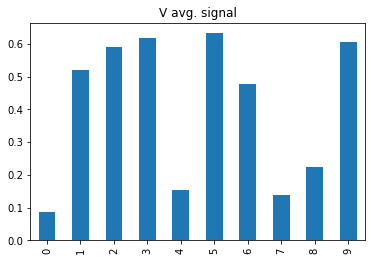

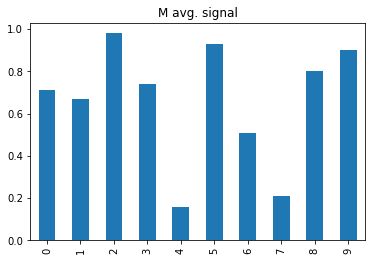

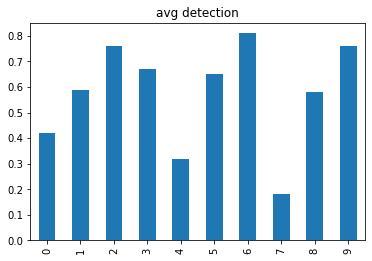

In [43]:
s_df = pd.DataFrame(s)
fig, ax = plt.subplots()
(s_df[:100].T * v).mean(1).plot.bar(ax=ax)
ax.set_title("V avg. signal")

fig, ax = plt.subplots()
s_df[100:].mean().plot.bar(ax=ax)
ax.set_title("M avg. signal")

fig, ax = plt.subplots()
d_df.mean().plot.bar(ax=ax)
ax.set_title("avg detection")

In [45]:
(s_df[:100].T * v).mean(1)

0    0.087424
1    0.521443
2    0.590628
3    0.617975
4    0.153693
5    0.631986
6    0.478127
7    0.139824
8    0.225595
9    0.605849
dtype: float64